<a href="https://colab.research.google.com/github/rushikeshnakhate/A2DataTech/blob/master/Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install jugaad_data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.8/115.8 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.1.7
    Uninstalling click-8.1.7:
      Successfully uninstalled click-8.1.7
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.11.2
    Uninstalling beautifulsoup4-4.11.2:
      Successfully uninstalled beautifulsoup4-4.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
flask 2.2.5 requires click>=8.0, but you have click 7.1.2 which is incompatible.
dask 2023.8.1 requires

In [ ]:
# import yfinance as yf
# infy = yf.Ticker('INFY').info
# for key,value in infy.items():
#   print("{}=>{}".format(key,value))

# from jugaad_data.nse import NSELive
# n = NSELive()
# q = n.stock_quote("HDFC")
# print(q)

from pathlib import Path
from datetime import date
from jugaad_data.nse import NSELive
from jugaad_data.nse import bhavcopy_save
import pandas as pd
output_dir = Path("/content/sample_data")
start_date = date(2024, 1, 17)
import os




In [ ]:
import pickle
def load_from_pickle(file_path):
    try:
      new_file_path = file_path.with_suffix(".pkl")
      with open(new_file_path,'rb') as file:
        return pickle.load(file)
    except FileNotFoundError:
      return None

def save_to_pickle(generated_file,file_path):
  new_file_path = file_path.with_suffix(".pkl")
  with open(new_file_path,'wb') as file:
    pickle.dump(generated_file,file)

In [ ]:
def download_data(start_date, output_file ,download_function, rename = True):
    data = load_from_pickle(output_file)
    if data is None:
        generated_file = download_function(start_date, output_file)
        print(f"{generated_file}: Data downloaded and saved to pickle file.")
        os.rename(generated_file,output_file) if rename else None
        save_to_pickle(generated_file, output_file)
    else:
        print(f"{output_file}: Data loaded from pickle file.")
    return data

In [ ]:
def download_bhavcopy(start_date  , output_file):
    generated_filename = bhavcopy_save(start_date, output_dir)
    return generated_filename

In [ ]:
def print_df(df):
  from google.colab import data_table
  data_table.enable_dataframe_formatter()
  display(df)

In [ ]:
if __name__ == "__main__":
  # output_file  = Path(output_dir)/("NseData_" + str(start_date) + ".csv")
  output_file  = Path(output_dir)/"NseData.csv"
  download_data(start_date, output_file,download_bhavcopy)
  df = pd.read_csv(output_file)
  df = df[df["SERIES"] == "EQ"]
  df = df.drop("Unnamed: 13",axis=1)
  print_df(df)

/content/sample_data/NseData.csv: Data loaded from pickle file.


SYMBOL SERIES      OPEN      HIGH       LOW     CLOSE      LAST  \
11    20MICRONS     EQ    165.00    174.45    162.60    169.70    170.00   
13       360ONE     EQ    655.00    658.45    637.65    646.55    646.00   
22    3IINFOLTD     EQ     53.05     55.45     52.70     53.60     53.50   
23      3MINDIA     EQ  34335.20  34669.40  33861.60  34345.40  34370.00   
24       3PLAND     EQ     35.10     36.70     34.45     34.60     34.45   
...         ...    ...       ...       ...       ...       ...       ...   
2632       ZOTA     EQ    485.00    492.45    478.00    487.10    490.50   
2633      ZUARI     EQ    226.75    236.20    218.85    231.35    231.40   
2634   ZUARIIND     EQ    232.80    242.90    224.15    239.75    238.85   
2635  ZYDUSLIFE     EQ    705.90    711.00    698.80    709.70    711.00   
2636  ZYDUSWELL     EQ   1626.00   1640.90   1610.00   1617.15   1613.00   

      PREVCLOSE  TOTTRDQTY     TOTTRDVAL    TIMESTAMP  TOTALTRADES  \
11       165.55     232724  3.963082e+07  17-JAN-2024        13212   
13       661.60     266993  1.726949e+08  17-JAN-2024        19123   
22        54.20    1907358  1.034260e+08  17-JAN-2024         9584   
23     34335.20       3171  1.089046e+08  17-JAN-2024         2063   
24        36.25     195061  6.949706e+06  17-JAN-2024         2110   
...         ...        ...           ...          ...          ...   
2632     487.60      27989  1.360710e+07  17-JAN-2024         2027   
2633     228.85     822562  1.903928e+08  17-JAN-2024        21965   
2634     235.95     375129  8.884693e+07  17-JAN-2024        16284   
2635     706.85     918668  6.495421e+08  17-JAN-2024        32897   
2636    1643.30      19117  3.106105e+07  17-JAN-2024         3703   

              ISIN  
11    INE144J01027  
13    INE466L01038  
22    INE748C01038  
23    INE470A01017  
24    INE105C01023  
...            ...  
2632  INE358U01012  
2633  INE840M01016  
2634  INE217A01012  
2635  INE010B01027  
2636  INE768C01010  

[1795 rows x 13 columns]

In [ ]:
import yfinance as yf

def get_sector(tick):
  tick_ = tick + ".NS"
  try:
    ticker = yf.Ticker(tick_)
    sector = ticker.info['sector']
    return sector
  except Exception as e:
    return "NOT_FOUND_ON_YAHOO"

In [ ]:
import concurrent.futures

# Function to get sector in parallel
def get_sector_parallel(symbol):
    # Check if the result is already saved in a file
    cache_file = f"sector_cache_{symbol}.pkl"
    if os.path.exists(cache_file):
        with open(cache_file, 'rb') as f:
            return pickle.load(f)
    else:
        # Perform the expensive operation
        result = get_sector(symbol)

        # Save the result to a file
        with open(cache_file, 'wb') as f:
            pickle.dump(result, f)
        return result


# Use ThreadPoolExecutor only if the result is not cached
with concurrent.futures.ThreadPoolExecutor() as executor:
  df['SECTOR'] = list(executor.map(get_sector_parallel, df['SYMBOL']))

# sector_not_found = (df['SECTOR'] == 'NOT_FOUND_ON_YAHOO').sum()
print_df(df)
# df.shape
# print(sector_not_found)


SYMBOL SERIES      OPEN      HIGH       LOW     CLOSE      LAST  \
11    20MICRONS     EQ    165.00    174.45    162.60    169.70    170.00   
13       360ONE     EQ    655.00    658.45    637.65    646.55    646.00   
22    3IINFOLTD     EQ     53.05     55.45     52.70     53.60     53.50   
23      3MINDIA     EQ  34335.20  34669.40  33861.60  34345.40  34370.00   
24       3PLAND     EQ     35.10     36.70     34.45     34.60     34.45   
...         ...    ...       ...       ...       ...       ...       ...   
2632       ZOTA     EQ    485.00    492.45    478.00    487.10    490.50   
2633      ZUARI     EQ    226.75    236.20    218.85    231.35    231.40   
2634   ZUARIIND     EQ    232.80    242.90    224.15    239.75    238.85   
2635  ZYDUSLIFE     EQ    705.90    711.00    698.80    709.70    711.00   
2636  ZYDUSWELL     EQ   1626.00   1640.90   1610.00   1617.15   1613.00   

      PREVCLOSE  TOTTRDQTY     TOTTRDVAL    TIMESTAMP  TOTALTRADES  \
11       165.55     232724  3.963082e+07  17-JAN-2024        13212   
13       661.60     266993  1.726949e+08  17-JAN-2024        19123   
22        54.20    1907358  1.034260e+08  17-JAN-2024         9584   
23     34335.20       3171  1.089046e+08  17-JAN-2024         2063   
24        36.25     195061  6.949706e+06  17-JAN-2024         2110   
...         ...        ...           ...          ...          ...   
2632     487.60      27989  1.360710e+07  17-JAN-2024         2027   
2633     228.85     822562  1.903928e+08  17-JAN-2024        21965   
2634     235.95     375129  8.884693e+07  17-JAN-2024        16284   
2635     706.85     918668  6.495421e+08  17-JAN-2024        32897   
2636    1643.30      19117  3.106105e+07  17-JAN-2024         3703   

              ISIN              SECTOR  
11    INE144J01027     Basic Materials  
13    INE466L01038  Financial Services  
22    INE748C01038          Technology  
23    INE470A01017         Industrials  
24    INE105C01023  NOT_FOUND_ON_YAHOO  
...            ...                 ...  
2632  INE358U01012          Healthcare  
2633  INE840M01016     Basic Materials  
2634  INE217A01012         Industrials  
2635  INE010B01027          Healthcare  
2636  INE768C01010  Consumer Defensive  

[1795 rows x 14 columns]

In [ ]:
# df_sorted = df.sort_values(by=["SECTOR"])
# print_df(df_sorted)


# df_grouped = df.groupby("SECTOR")
# # Print the unique sectors and corresponding stocks
# for sector, stocks in df_grouped:
#     print(f"Unit Sector: {sector}")
#     print(f"Stocks: {stocks['SYMBOL'].tolist()}\n")

def generate_peformance_for_date(start_date,output_file):
  # Calculate daily returns
  df['DAILY_RETURN'] = (df['CLOSE'] - df['OPEN']) / df['OPEN']
  # Group by 'SECTOR' and calculate average daily return and volatility
  sector_performance = df.groupby('SECTOR').agg({
      'DAILY_RETURN': ['std','mean']
  }).reset_index()
  sector_performance["TRADEDATE"] = start_date



def get_performance_for_date(df,start_date):
  sector_performance_file = "sector_performance_file" + start_date
  return download_data(start_date, sector_performance_file ,generate_peformance_for_date, rename = False):


  save_to_pickle(sector_performance_file)



if __name__ == "__main__":
    df = get_performance_for_date(start_date)

SYMBOL SERIES     OPEN     HIGH      LOW    CLOSE     LAST  \
11     20MICRONS     EQ   165.00   174.45   162.60   169.70   170.00   
1767  PDMJEPAPER     EQ    55.65    56.60    54.20    54.65    55.00   
586       DICIND     EQ   533.85   538.90   516.15   525.30   524.10   
584    DIAMINESQ     EQ   521.05   538.95   511.05   527.70   522.40   
1794  PIDILITIND     EQ  2789.00  2789.00  2720.80  2757.75  2764.00   
...          ...    ...      ...      ...      ...      ...      ...   
855         GSPL     EQ   324.90   324.90   315.55   317.10   317.00   
1685        NTPC     EQ   309.75   314.10   307.10   309.30   309.65   
1114   INOXGREEN     EQ   131.55   133.20   128.00   128.80   128.00   
865    GUJGASLTD     EQ   555.70   566.50   549.75   555.15   555.90   
1316    KPIGREEN     EQ  1421.00  1435.00  1401.00  1424.45  1415.00   

      PREVCLOSE  TOTTRDQTY     TOTTRDVAL    TIMESTAMP  TOTALTRADES  \
11       165.55     232724  3.963082e+07  17-JAN-2024        13212   
1767      57.00     604852  3.346990e+07  17-JAN-2024         3937   
586      534.80      16718  8.867087e+06  17-JAN-2024         1540   
584      529.95      18129  9.475200e+06  17-JAN-2024         2460   
1794    2795.55     761187  2.087347e+09  17-JAN-2024        46561   
...         ...        ...           ...          ...          ...   
855      325.50     541645  1.731583e+08  17-JAN-2024        16418   
1685     311.50   13502940  4.197673e+09  17-JAN-2024       170640   
1114     133.80    1676363  2.182414e+08  17-JAN-2024        11718   
865      556.05    2688070  1.505631e+09  17-JAN-2024        62306   
1316    1422.45     158627  2.252835e+08  17-JAN-2024        13392   

              ISIN           SECTOR  
11    INE144J01027  Basic Materials  
1767  INE865T01018  Basic Materials  
586   INE303A01010  Basic Materials  
584   INE591D01014  Basic Materials  
1794  INE318A01026  Basic Materials  
...            ...              ...  
855   INE246F01010        Utilities  
1685  INE733E01010        Utilities  
1114  INE510W01014        Utilities  
865   INE844O01030        Utilities  
1316  INE542W01017        Utilities  

[1795 rows x 14 columns]

Unit Sector: Basic Materials
Stocks: ['20MICRONS', 'AARTIIND', 'AARTISURF', 'ACC', 'ACI', 'ADVENZYMES', 'AETHER', 'AGARIND', 'AGROPHOS', 'AKSHARCHEM', 'AKZOINDIA', 'ALKALI', 'ALKYLAMINE', 'AMBUJACEM', 'AMIORG', 'ANDHRAPAP', 'ANDHRSUGAR', 'ANURAS', 'APCL', 'APCOTEXIND', 'APLAPOLLO', 'ARENTERP', 'ARIES', 'ASAHISONG', 'ASHAPURMIN', 'ASIANPAINT', 'ASTEC', 'ASTRON', 'ATUL', 'AVTNPL', 'BALAMINES', 'BASF', 'BAYERCROP', 'BEDMUTHA', 'BEPL', 'BERGEPAINT', 'BHAGCHEM', 'BHAGERIA', 'BHAGYANGR', 'BHARATRAS', 'BHARATWIRE', 'BIRLACORPN', 'BODALCHEM', 'BSHSL', 'CAMLINFINE', 'CENTEXT', 'CENTURYPLY', 'CENTURYTEX', 'CHAMBLFERT', 'CHEMBOND', 'CHEMCON', 'CHEMFAB', 'CHEMPLASTS', 'CLEAN', 'COROMANDEL', 'DALBHARAT', 'DCMSHRIRAM', 'DCW', 'DECCANCE', 'DEEPAKFERT', 'DEEPAKNTR', 'DHANUKA', 'DHARMAJ', 'DIAMINESQ', 'DICIND', 'DMCC', 'DYNPRO', 'EIDPARRY', 'ELECTCAST', 'EPIGRAL', 'ESTER', 'EXCELINDUS', 'FACT', 'FAIRCHEMOR', 'FCL', 'FINEORG', 'FLUOROCHEM', 'FOSECOIND', 'GALAXYSURF', 'GALLANTT', 'GANESHBE', 'GENUSPAPER'

                    SECTOR DAILY_RETURN             TRADEDATE
                                    std      mean            
0          Basic Materials     0.022388 -0.005030  2024-01-17
1   Communication Services     0.042719  0.009696  2024-01-17
2        Consumer Cyclical     0.022795 -0.004585  2024-01-17
3       Consumer Defensive     0.026542 -0.000234  2024-01-17
4                   Energy     0.014375  0.000584  2024-01-17
5       Financial Services     0.025182 -0.004131  2024-01-17
6               Healthcare     0.016941 -0.004742  2024-01-17
7              Industrials     0.022092  0.001383  2024-01-17
8       NOT_FOUND_ON_YAHOO     0.019691 -0.007520  2024-01-17
9              Real Estate     0.029215  0.005467  2024-01-17
10              Technology     0.025109  0.004910  2024-01-17
11               Utilities     0.026051  0.005900  2024-01-17


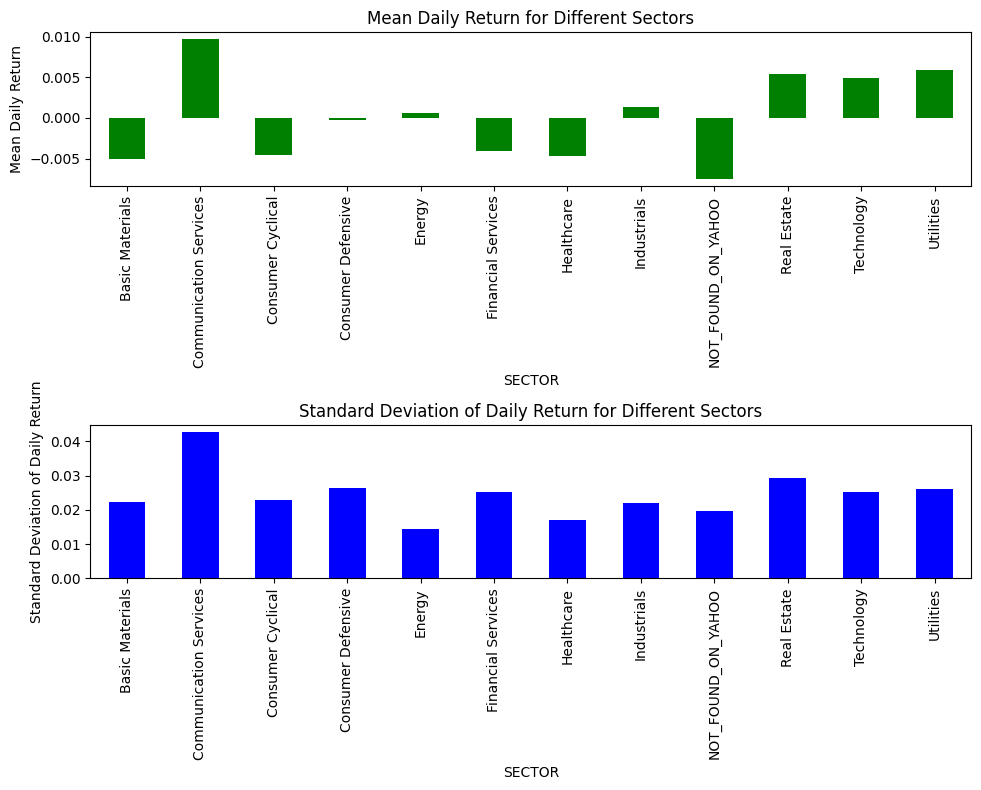

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a DataFrame named 'df'
# If not, you need to create a DataFrame with the provided data.

# Sample data for illustration purposes
data = {
    'SECTOR': ['Basic Materials', 'Communication Services', 'Consumer Cyclical', 'Consumer Defensive',
               'Energy', 'Financial Services', 'Healthcare', 'Industrials', 'NOT_FOUND_ON_YAHOO',
               'Real Estate', 'Technology', 'Utilities'],
    'DAILY_RETURN_mean': [-0.005030, 0.009696, -0.004585, -0.000234, 0.000584, -0.004131, -0.004742,
                          0.001383, -0.007520, 0.005467, 0.004910, 0.005900],
    'DAILY_RETURN_std': [0.022388, 0.042719, 0.022795, 0.026542, 0.014375, 0.025182, 0.016941, 0.022092,
                         0.019691, 0.029215, 0.025109, 0.026051]
}

df = pd.DataFrame(data)

# Plotting mean and std for each sector
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

df.plot(kind='bar', x='SECTOR', y='DAILY_RETURN_mean', ax=ax1, legend=False, color='green')
ax1.set_ylabel('Mean Daily Return')
ax1.set_title('Mean Daily Return for Different Sectors')

df.plot(kind='bar', x='SECTOR', y='DAILY_RETURN_std', ax=ax2, legend=False, color='blue')
ax2.set_ylabel('Standard Deviation of Daily Return')
ax2.set_title('Standard Deviation of Daily Return for Different Sectors')

plt.tight_layout()
plt.show()
